In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image
import numpy as np
from keras.optimizers import adam_v2
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet

In [3]:
breast_images = glob.glob('.ipynb_checkpoints/Dataset/**/*.png', recursive = True)

for imgname in breast_images[:10]:
    print(imgname)

.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1001_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1051_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1101_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1151_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1201_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1251_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1301_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1351_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1401_class0.png
.ipynb_checkpoints/Dataset\8863\0\8863_idx5_x1001_y1451_class0.png


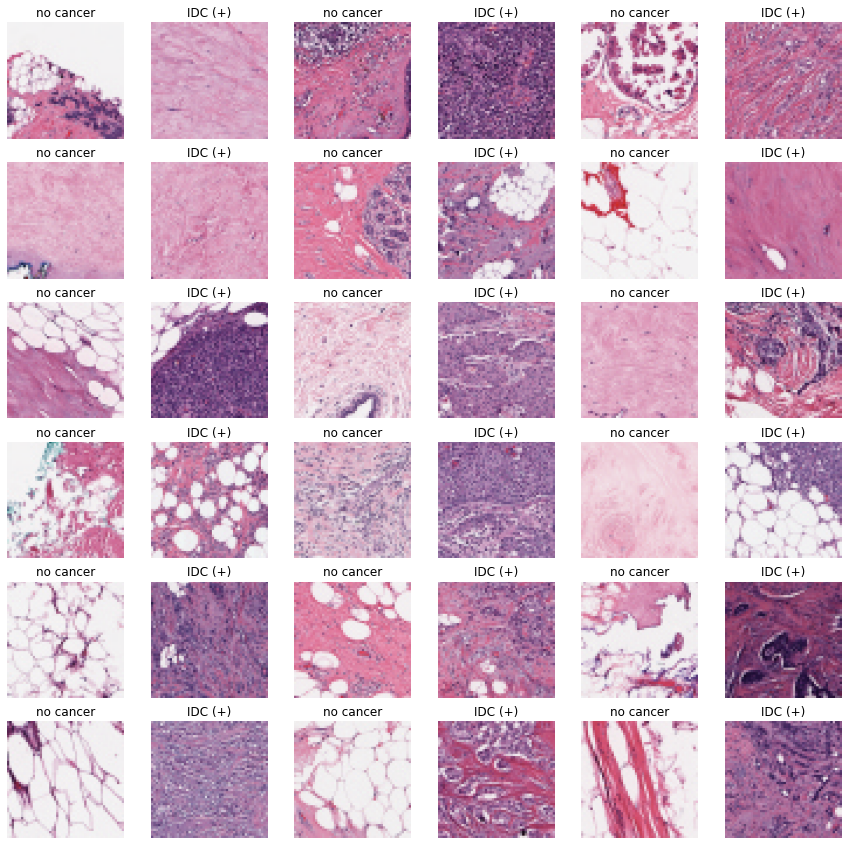

In [5]:
negative = []
positive = []

for img in breast_images:
    if img[-5] == '0' :
        negative.append(img)
    
    elif img[-5] == '1' :
        positive.append(img)
plt.figure(figsize = (15, 15))

no_cancer = np.random.randint(0, len(negative), 18)

cancer = np.random.randint(0, len(positive), 18)

s = 0
for num in no_cancer:
    
        img = image.load_img((negative[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in cancer:
    
        img = image.load_img((positive[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

In [6]:
no_cancer_image = []
cancer_image = []

for img in negative:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (75, 75), interpolation = cv2.INTER_LINEAR)
    no_cancer_image.append([n_img_size, 0])
    
for img in positive:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (75, 75), interpolation = cv2.INTER_LINEAR)
    cancer_image.append([c_img_size, 1])

In [7]:
import numpy
import random

In [8]:
len(cancer_image)

18964

In [9]:
n_cancer = no_cancer_image[:18964]

In [10]:
len(cancer_image)

18964

In [11]:
X = []
Y = []

breast_image_list = np.concatenate((n_cancer, cancer_image))
random.shuffle(breast_image_list)

for feature, label in breast_image_list:
    X.append(feature)
    Y.append(label)
    
X = np.array(X)
Y = np.array(Y)
#(81141, 50, 50, 3)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [12]:
len(Y)

37928

In [13]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,Y)


Total number of images: 37928
Number of IDC(-) Images: 32058
Number of IDC(+) Images: 5870
Image shape (Width, Height, Channels): (75, 75, 3)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (26549, 75, 75, 3)
Testing Data Shape: (11379, 75, 75, 3)


In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = MobileNet(weights='imagenet', include_top=False,
                            input_shape=(75, 75,3))
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(4096,activation="relu")(x)
x = Dense(4096,activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(2096,activation="relu")(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable==True:
        print(layer)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 75, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 38, 38, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 38, 38, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 38, 38, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 38, 38, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 38, 38, 32)       128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 4, 4, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 4, 4, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 4, 4, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 4, 4, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 4, 4, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 4, 4, 512)         262144    
                                                                 
 conv_pw_9

In [17]:
callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                ModelCheckpoint('histopath_model2.hdf5',
                                 save_best_only=True)]
opt = adam_v2.Adam(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

%time
history=model.fit(X_train, Y_train,validation_data=(X_test, Y_test),verbose = 1,epochs = 30,callbacks=callbacks)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/30
830/830 [==============================] - 618s 738ms/step - loss: 0.3636 - accuracy: 0.8731 - val_loss: 0.2997 - val_accuracy: 0.8828
Epoch 2/30
830/830 [==============================] - 609s 734ms/step - loss: 0.3015 - accuracy: 0.8803 - val_loss: 0.2847 - val_accuracy: 0.8870
Epoch 3/30
830/830 [==============================] - 580s 699ms/step - loss: 0.2918 - accuracy: 0.8856 - val_loss: 0.2982 - val_accuracy: 0.8846
Epoch 4/30
830/830 [==============================] - 577s 695ms/step - loss: 0.2827 - accuracy: 0.8893 - val_loss: 0.3165 - val_accuracy: 0.8774
Epoch 5/30
830/830 [==============================] - 304s 366ms/step - loss: 0.2777 - accuracy: 0.8894 - val_loss: 0.2926 - val_accuracy: 0.8857
Epoch 6/30
830/830 [==============================] - 1285s 2s/step - loss: 0.2692 - accuracy: 0.8940 - val_loss: 0.2794 - val_accuracy: 0.8908
Epoch 7/30
830/830 [==============================] - 247s 297ms/step - loss: 0.2642 - 

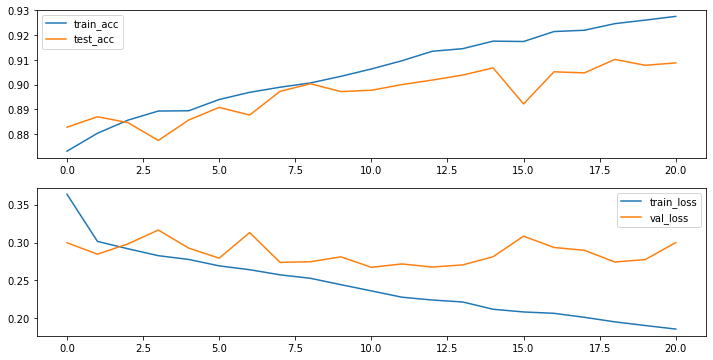

In [18]:
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label = "test_acc")
plt.legend()
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()  

356/356 [==============================] - 74s 178ms/step


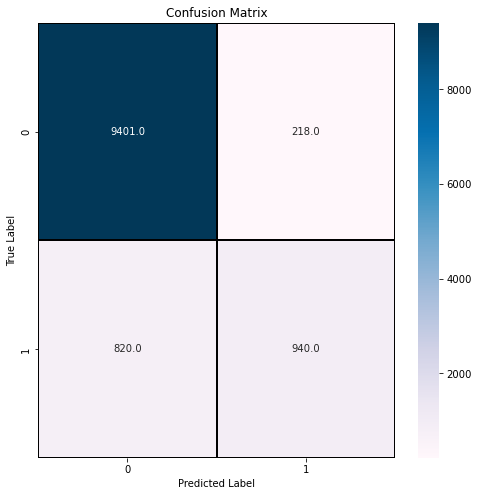

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 



confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="PuBu",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
print(Y_pred[0] ,Y_pred_classes[0] , Y_true[0])
print(Y_pred[2767] ,Y_pred_classes[2767] , Y_true[2767])
y = np.array(Y_true)
y2 = np.array(Y_pred_classes)
ls = []
for i in range(0,len(y)):
    if y[i] == 1  :
        ls.append(i)
#print(ls)
Y_pred_classes.shape

[0.8468119  0.21159302] 0 1
[0.82961994 0.21270737] 0 0


(11379,)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9619
           1       0.81      0.53      0.64      1760

    accuracy                           0.91     11379
   macro avg       0.87      0.76      0.80     11379
weighted avg       0.90      0.91      0.90     11379

